In [1]:
import pandas as pd
import statistics
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import statistics as stat
from scipy.stats import binom
from sklearn.preprocessing import StandardScaler
from matplotlib.patches import Rectangle
# splitting merge_data into train test and split
from sklearn.model_selection import train_test_split, cross_validate
from scipy import stats
from scipy.stats import normaltest
import os 
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import matplotlib as mpl
import warnings; warnings.filterwarnings(action='once')
# to keep track of training time
import datetime
# logistic regression model
from sklearn.linear_model import LogisticRegression
# metrics used for evaluation
from sklearn.metrics import f1_score, matthews_corrcoef, roc_auc_score
# visualizations
from yellowbrick.classifier import ClassPredictionError, ConfusionMatrix
from sklearn.metrics import plot_roc_curve
# KNN imputation
from sklearn.impute import KNNImputer
# normalizer
from sklearn.preprocessing import Normalizer
# variance threshold
from sklearn.feature_selection import VarianceThreshold
# RFECV
from sklearn.model_selection import StratifiedKFold
# random forest
from sklearn.ensemble import RandomForestClassifier
# evaluation metric
from sklearn.metrics import matthews_corrcoef, make_scorer
from scipy import stats 
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split 
from sklearn.model_selection import cross_val_score # Evaluate a score by cross-validation
from sklearn.model_selection import GridSearchCV # Exhaustive search over specified parameter values for an estimator
from sklearn.metrics import classification_report # Build a text report showing the main classification metrics
from sklearn.metrics import accuracy_score # Accuracy classification score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # to show confusion matrix
from sklearn import metrics # Evaluate ROC curve
from sklearn.experimental import enable_iterative_imputer # Enables IterativeImputer. The API and results of this estimator might change without any deprecation cycle
from sklearn.impute import IterativeImputer
from imblearn.combine import SMOTEENN # Combine over- and under-sampling using SMOTE and Edited Nearest Neighbours
from sklearn import decomposition
from boruta import BorutaPy
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.metrics import plot_confusion_matrix
from matplotlib.colors import ListedColormap
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from yellowbrick.model_selection import RFECV
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier


c:\ProgramData\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



Read files 

In [2]:
def read_features():
    path ='secom.data'
    df = pd.read_csv(path, delimiter=' ', header=None, na_values=['NaN'])
    df.columns = ['feature_'+str(x+1) for x in range(len(df.columns))]
    return df

#%%
def read_target():
    path = 'secom_labels.data'
    df = pd.read_csv(path, delimiter=' ', header=None, na_values=['NaN'])
    df.columns = ['status','timestamp']
    df['timestamp'] = pd.to_datetime(df['timestamp'],dayfirst=True)
    return df

#read 2 df 
x = read_features()
y = read_target().iloc[:,0]

# Data Preparation

## Merge data

In [3]:
#df= pd.concat([df_features,df_target],axis=1)

## Split Training and test data 

In [4]:
x = read_features()
y = read_target().iloc[:,0]

result = []
i = 0

#step 1:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1, stratify=y)

In [5]:
x_train.isna().sum().sum()

33219

In [6]:
result = []
i = 0

In [7]:
#find the duplicated features (columns)
def remove_duplicated_columns(df):
    dict_duplicate_pair = {}
    dict_duplicate_matches = {}
    list_duplicate = []
    to_remove = []
    for i in range(0, len(df.columns)):
        l = []
        for j in range(i+1,len(df.columns)):
            dict_duplicate_pair[str(i+1)+';'+str(j+1)] = df.iloc[:,i].equals(df.iloc[:,j])
            if df.iloc[:,i].equals(df.iloc[:,j]) == True:
                if j not in list_duplicate:
                    l.append(j)
                    to_remove.append('feature_'+str(j+1))
                list_duplicate.append(i)
                list_duplicate.append(j)
        if len(l)!=0:
            dict_duplicate_matches[i] = l


    df_duplicate_pair = pd.DataFrame.from_dict(dict_duplicate_pair, orient='index')
    df_duplicate_pair.columns=['duplicate']

    df_duplicate_matches = pd.DataFrame.from_dict(dict_duplicate_matches, orient='index')

    
    df = df.drop(columns=to_remove, axis = 1)

    return df

x = remove_duplicated_columns(x)
x.shape

(1567, 486)

In [8]:
x_train = remove_duplicated_columns(x_train)

In [9]:
x_train

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_581,feature_582,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,feature_590
443,3079.77,2354.51,2207.0444,1269.6078,1.7571,100.0,97.0189,0.1221,1.4607,0.0155,...,0.0059,68.7444,0.5001,0.0110,0.0034,2.1899,0.0282,0.0194,0.0059,68.7444
760,3001.36,2491.23,2155.3111,918.2161,1.2753,100.0,105.0478,0.1227,1.4206,-0.0052,...,NaN,NaN,0.4943,0.0199,0.0042,4.0318,0.0169,0.0276,0.0081,163.9998
479,3042.78,2377.89,2173.4556,1433.6732,1.0304,100.0,110.5422,0.1245,1.4964,0.0204,...,NaN,NaN,0.4962,0.0114,0.0034,2.2877,0.0208,0.0287,0.0091,138.2861
362,3018.64,2401.80,2224.0000,1510.0797,1.5611,100.0,99.8300,0.1199,1.4428,-0.0110,...,0.0038,49.7490,0.5047,0.0101,0.0031,1.9927,0.0284,0.0141,0.0038,49.7490
662,3020.29,2433.99,2217.8111,1744.7771,0.9618,100.0,100.1789,0.1218,1.4950,-0.0097,...,NaN,NaN,0.5010,0.0147,0.0036,2.9338,0.0165,0.0114,0.0043,68.9871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,3057.31,2481.53,2214.9333,1663.7024,1.0203,100.0,100.4456,0.1247,1.4830,-0.0328,...,NaN,NaN,0.5037,0.0175,0.0039,3.4736,0.0263,0.0117,0.0033,44.3686
821,3009.71,2565.53,2224.6778,1308.6479,1.3907,100.0,101.1333,0.1208,1.4440,-0.0079,...,NaN,NaN,0.4979,0.0078,0.0024,1.5724,0.0275,0.0215,0.0076,78.1199
213,3034.34,2631.47,2179.0445,2028.2208,1.5552,100.0,95.4256,0.1234,1.4281,0.0049,...,NaN,NaN,0.4968,0.0128,0.0035,2.5829,0.0298,0.0116,0.0039,38.9781
1556,3025.21,2503.30,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3687,-0.0070,...,0.0016,46.1076,0.5019,0.0158,0.0043,3.1428,0.0120,0.0055,0.0016,46.1076


## reducing dimensionality 

### remove missing values 

In [10]:
def null_values(df):
    """a function to show null values with percentage"""
    nv=pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/df.shape[0]],axis=1).rename(columns={0:'Missing_Records', 1:'Percentage (%)'})
    return nv[nv.Missing_Records>0].sort_values('Missing_Records', ascending=False)

In [11]:
x_train_na = null_values(x_train)
x_train_na

,Missing_Records,Percentage (%)
feature_158,1144,91.300878
feature_294,1144,91.300878
feature_293,1144,91.300878
feature_159,1144,91.300878
feature_493,1072,85.554669
...,...,...
feature_367,1,0.079808
feature_366,1,0.079808
feature_145,1,0.079808
feature_146,1,0.079808


In [12]:
miss_threshold=80
x_train_na= x_train_na[x_train_na["Percentage (%)"] > miss_threshold]
x_train_na

,Missing_Records,Percentage (%)
feature_158,1144,91.300878
feature_294,1144,91.300878
feature_293,1144,91.300878
feature_159,1144,91.300878
feature_493,1072,85.554669
feature_359,1072,85.554669
feature_86,1072,85.554669
feature_221,1072,85.554669


In [13]:
x_train_new = x_train.drop(axis=1, columns=x_train_na.index)
x_train_new.shape

(1253, 478)

### removing constant voltality

In [14]:
x_train_new_eda= x_train_new.describe().T
x_train_new_eda

,count,mean,std,min,25%,50%,75%,max
feature_1,1248.0,3014.113686,73.877303,2743.2400,2966.2300,3011.40500,3056.310000,3356.3500
feature_2,1247.0,2496.400585,79.188651,2162.8700,2452.3350,2500.38000,2539.600000,2846.4400
feature_3,1243.0,2200.216525,29.939025,2060.6600,2180.8611,2200.98890,2218.055500,2315.2667
feature_4,1243.0,1394.907987,436.632421,0.0000,1083.8858,1283.43680,1593.122000,3715.0417
feature_5,1243.0,4.018582,54.572445,0.6815,1.0160,1.31710,1.525700,1114.5366
...,...,...,...,...,...,...,...,...
feature_586,1252.0,3.084501,3.968128,1.1975,2.3058,2.74655,3.258475,99.3032
feature_587,1252.0,0.021521,0.012421,-0.0060,0.0134,0.02070,0.027600,0.1028
feature_588,1252.0,0.016344,0.008698,0.0042,0.0106,0.01480,0.019800,0.0799
feature_589,1252.0,0.005248,0.002850,0.0012,0.0033,0.00460,0.006300,0.0286


In [15]:
x_train_new_eda[x_train_new_eda['std']==0]
x_train_new_std= x_train_new_eda[x_train_new_eda["std"] == 0]
x_train_new_std

,count,mean,std,min,25%,50%,75%,max
feature_6,1243.0,100.0,0.0,100.0,100.0,100.0,100.0,100.0
feature_14,1251.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feature_43,1253.0,70.0,0.0,70.0,70.0,70.0,70.0,70.0
feature_50,1253.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
feature_53,1253.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feature_70,1248.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
feature_98,1249.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feature_142,1243.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feature_179,1234.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feature_191,1250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
x_train_new_2 = x_train_new.drop(axis=1, columns=x_train_new_std.index)
x_train_new_2.shape

(1253, 466)

## Outlier Treatment

In [17]:
x_train_3s=x_train_new_2.copy()

In [18]:
def zscore(df,cols,thr):
    for col in cols:
        mean=df[col].mean()
        std=df[col].std()
        upper_bound=mean+ thr*std
        lower_bound=mean- thr*std
        df[col]=np.where(df[col]>upper_bound,upper_bound,np.where(df[col]<lower_bound,lower_bound,df[col]))

In [19]:
zscore(x_train_3s,x_train_3s.columns,3)

## Imputation

### KNN Imputation

In [20]:
#scaling before distanced based algo
scaler = MinMaxScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train_3s), columns=x_train_3s.columns)
x_train_scaled

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_7,feature_8,feature_9,feature_10,feature_11,...,feature_581,feature_582,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,feature_590
0,0.648120,0.201366,0.538010,0.452172,0.006439,0.392017,0.787343,0.527160,0.680406,0.663699,...,0.345437,0.190010,0.514663,0.075172,0.110693,0.071958,0.527907,0.397495,0.373085,0.182951
1,0.471228,0.489118,0.250017,0.318042,0.003555,0.606695,0.806973,0.430272,0.451391,0.514345,...,NaN,NaN,0.224461,0.208979,0.166039,0.205512,0.353482,0.611932,0.547721,0.436456
2,0.564671,0.250573,0.351025,0.514797,0.002089,0.753605,0.865862,0.613416,0.734617,0.735677,...,NaN,NaN,0.319527,0.081186,0.110693,0.079049,0.413682,0.640698,0.627101,0.368023
3,0.510211,0.300896,0.632400,0.543962,0.005265,0.467181,0.715366,0.483910,0.387223,0.678095,...,0.191093,0.137507,0.744823,0.061641,0.089938,0.057659,0.530994,0.258894,0.206388,0.132398
4,0.513934,0.368646,0.597947,0.633548,0.001678,0.476510,0.777528,0.610033,0.401606,0.399181,...,NaN,NaN,0.559694,0.130800,0.124529,0.125897,0.347307,0.188287,0.246077,0.183597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,0.597451,0.468702,0.581926,0.602601,0.002028,0.483641,0.872406,0.581040,0.146039,0.582724,...,NaN,NaN,0.694788,0.172896,0.145284,0.165038,0.498579,0.196132,0.166698,0.118079
1249,0.490065,0.645495,0.636173,0.467074,0.004245,0.502029,0.744811,0.486810,0.421520,0.359593,...,NaN,NaN,0.404586,0.027062,0.041510,0.027184,0.517102,0.452412,0.508031,0.207902
1250,0.545630,0.784278,0.382138,0.741741,0.005230,0.349415,0.829874,0.448393,0.563133,0.661900,...,NaN,NaN,0.349548,0.102234,0.117611,0.100454,0.552604,0.193517,0.214325,0.103733
1251,0.525033,0.514521,0.385973,1.000000,0.004806,0.000000,0.875677,0.304874,0.431477,0.436969,...,0.029399,0.127442,0.604725,0.147337,0.172957,0.141052,0.277846,0.033996,0.031752,0.122707


In [21]:
# impute missing values and save it as a temporary dataset.
# no need to use scalr before applying teh KNN model , fit_transform fits and scales automatically
#use fit_transform on training data and only transform on test data
knn = KNNImputer(weights='distance')
#knn.fit(x_train_scaled)
#imputed_train = pd.DataFrame(knn.fit_transform(x_train_3s), columns = x_train_3s.columns)
imputed_train = pd.DataFrame(knn.fit_transform(x_train_scaled), columns = x_train_scaled.columns)

In [22]:
imputed_train

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_7,feature_8,feature_9,feature_10,feature_11,...,feature_581,feature_582,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,feature_590
0,0.648120,0.201366,0.538010,0.452172,0.006439,0.392017,0.787343,0.527160,0.680406,0.663699,...,0.345437,0.190010,0.514663,0.075172,0.110693,0.071958,0.527907,0.397495,0.373085,0.182951
1,0.471228,0.489118,0.250017,0.318042,0.003555,0.606695,0.806973,0.430272,0.451391,0.514345,...,0.419934,0.229978,0.224461,0.208979,0.166039,0.205512,0.353482,0.611932,0.547721,0.436456
2,0.564671,0.250573,0.351025,0.514797,0.002089,0.753605,0.865862,0.613416,0.734617,0.735677,...,0.277680,0.172202,0.319527,0.081186,0.110693,0.079049,0.413682,0.640698,0.627101,0.368023
3,0.510211,0.300896,0.632400,0.543962,0.005265,0.467181,0.715366,0.483910,0.387223,0.678095,...,0.191093,0.137507,0.744823,0.061641,0.089938,0.057659,0.530994,0.258894,0.206388,0.132398
4,0.513934,0.368646,0.597947,0.633548,0.001678,0.476510,0.777528,0.610033,0.401606,0.399181,...,0.237025,0.337292,0.559694,0.130800,0.124529,0.125897,0.347307,0.188287,0.246077,0.183597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,0.597451,0.468702,0.581926,0.602601,0.002028,0.483641,0.872406,0.581040,0.146039,0.582724,...,0.213805,0.129369,0.694788,0.172896,0.145284,0.165038,0.498579,0.196132,0.166698,0.118079
1249,0.490065,0.645495,0.636173,0.467074,0.004245,0.502029,0.744811,0.486810,0.421520,0.359593,...,0.250725,0.155534,0.404586,0.027062,0.041510,0.027184,0.517102,0.452412,0.508031,0.207902
1250,0.545630,0.784278,0.382138,0.741741,0.005230,0.349415,0.829874,0.448393,0.563133,0.661900,...,0.319653,0.106344,0.349548,0.102234,0.117611,0.100454,0.552604,0.193517,0.214325,0.103733
1251,0.525033,0.514521,0.385973,1.000000,0.004806,0.000000,0.875677,0.304874,0.431477,0.436969,...,0.029399,0.127442,0.604725,0.147337,0.172957,0.141052,0.277846,0.033996,0.031752,0.122707


In [23]:
retransformed_train= pd.DataFrame(scaler.inverse_transform(imputed_train), columns=imputed_train.columns)

In [24]:

retransformed_train

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_7,feature_8,feature_9,feature_10,feature_11,...,feature_581,feature_582,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,feature_590
0,3079.77,2354.51,2207.0444,1269.607800,1.7571,97.018900,0.1221,1.4607,0.0155,0.0093,...,0.005900,68.744400,0.5001,0.0110,0.0034,2.1899,0.0282,0.0194,0.0059,68.7444
1,3001.36,2491.23,2155.3111,918.216100,1.2753,105.047800,0.1227,1.4206,-0.0052,0.0010,...,0.006914,83.204329,0.4943,0.0199,0.0042,4.0318,0.0169,0.0276,0.0081,163.9998
2,3042.78,2377.89,2173.4556,1433.673200,1.0304,110.542200,0.1245,1.4964,0.0204,0.0133,...,0.004978,62.301563,0.4962,0.0114,0.0034,2.2877,0.0208,0.0287,0.0091,138.2861
3,3018.64,2401.80,2224.0000,1510.079700,1.5611,99.830000,0.1199,1.4428,-0.0110,0.0101,...,0.003800,49.749000,0.5047,0.0101,0.0031,1.9927,0.0284,0.0141,0.0038,49.7490
4,3020.29,2433.99,2217.8111,1744.777100,0.9618,100.178900,0.1218,1.4950,-0.0097,-0.0054,...,0.004425,122.030067,0.5010,0.0147,0.0036,2.9338,0.0165,0.0114,0.0043,68.9871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,3057.31,2481.53,2214.9333,1663.702400,1.0203,100.445600,0.1247,1.4830,-0.0328,0.0048,...,0.004109,46.804881,0.5037,0.0175,0.0039,3.4736,0.0263,0.0117,0.0033,44.3686
1249,3009.71,2565.53,2224.6778,1308.647900,1.3907,101.133300,0.1208,1.4440,-0.0079,-0.0076,...,0.004611,56.271160,0.4979,0.0078,0.0024,1.5724,0.0275,0.0215,0.0076,78.1199
1250,3034.34,2631.47,2179.0445,2028.220800,1.5552,95.425600,0.1234,1.4281,0.0049,0.0092,...,0.005549,38.474542,0.4968,0.0128,0.0035,2.5829,0.0298,0.0116,0.0039,38.9781
1251,3025.21,2503.30,2179.7333,2704.805249,1.4843,82.357569,0.1248,1.3687,-0.0070,-0.0033,...,0.001600,46.107600,0.5019,0.0158,0.0043,3.1428,0.0120,0.0055,0.0016,46.1076


## Feature Selection

In [25]:
#NOTE: no need to retransform /unscale
#retransformed_train= pd.DataFrame(scaler.inverse_transform(imputed_train), columns=imputed_train.columns)

Boruta Shap with Random forest 

In [26]:
from BorutaShap import BorutaShap

In [27]:
from sklearn.metrics import recall_score

In [28]:
#Boruta Shap function with random forest

def BorutaShapFeatureSelection (X, y) :
    feature_names = np.array(X.columns)

    # define random forest classifier
    modelshap = RandomForestClassifier(n_jobs=-1,n_estimators=100, max_depth=5, random_state=100)
    modelshap.fit(X,y)
    
    # define Boruta feature selection method
    feature_selector = BorutaShap(model=modelshap,
                              importance_measure='shap',
                              classification=True)

    # find all relevant features
    feature_selector.fit(X,y,n_trials=100,sample = False, verbose = True,random_state=100)
    feature_selector.plot(which_features='accepted',figsize=(20,10))
 # call transform() on X to filter it down to selected features
    return  feature_selector.Subset()


In [29]:
X_trainshap= BorutaShapFeatureSelection(retransformed_train,y_train)

 67%|██████▋   | 67/100 [00:29<00:14,  2.29it/s]


KeyboardInterrupt: 

In [ ]:
X_trainshap

,feature_478,feature_442,feature_299,feature_66,feature_22,feature_349,feature_60,feature_34,feature_332,feature_461,feature_283,feature_435,feature_133,feature_164,feature_342,feature_206,feature_65,feature_124
0,6.0266,0.9639,0.0595,23.2216,-4750.75,0.02370,0.6991,8.6915,0.0791,14.7554,0.0058,9.9805,2.3766,0.128,2.6547,9.22,19.3009,15.83
1,4.8218,0.8427,0.0662,27.2716,-5410.75,0.02720,-1.4173,8.3006,0.1071,12.1570,0.0045,12.5349,2.3805,0.157,2.0989,7.31,21.4173,15.75
2,6.1589,0.9193,0.0519,14.7061,-6456.75,0.01630,10.2355,8.7418,0.0852,21.1169,0.0064,12.8413,2.3244,0.127,2.5012,8.80,9.7645,15.69
3,5.0612,0.7158,0.0635,36.0791,-5775.00,0.03000,9.8518,8.6829,0.0985,41.7748,0.0088,10.5202,2.3725,0.135,2.4329,7.77,30.1482,15.81
4,7.4828,1.1255,0.0505,24.3057,-6900.50,0.02430,1.0336,8.5891,0.0817,23.1457,0.0035,11.1054,2.3401,0.108,3.2653,11.06,18.9664,15.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,4.6390,0.8217,0.0449,21.2894,-6451.75,0.02640,3.2964,9.1156,0.1017,18.4257,0.0038,10.2005,2.3323,0.103,1.8996,6.83,16.7036,15.98
1249,6.6740,0.7558,0.0474,21.3048,-5470.25,0.01830,3.0345,8.4278,0.0850,31.6124,0.0038,7.7608,2.2989,0.098,2.7085,9.58,16.9655,15.84
1250,6.3958,0.9794,0.0721,36.4489,-5972.75,0.02680,11.4855,8.5155,0.0968,60.3473,0.0099,12.0903,2.3646,0.154,3.1945,9.74,28.5145,15.97
1251,4.3482,0.8452,0.0191,29.5080,-5735.25,0.02382,-2.3109,9.0650,0.1104,16.9711,0.0072,3.4550,2.2886,0.044,1.9995,6.56,22.3109,15.73


<AxesSubplot:>

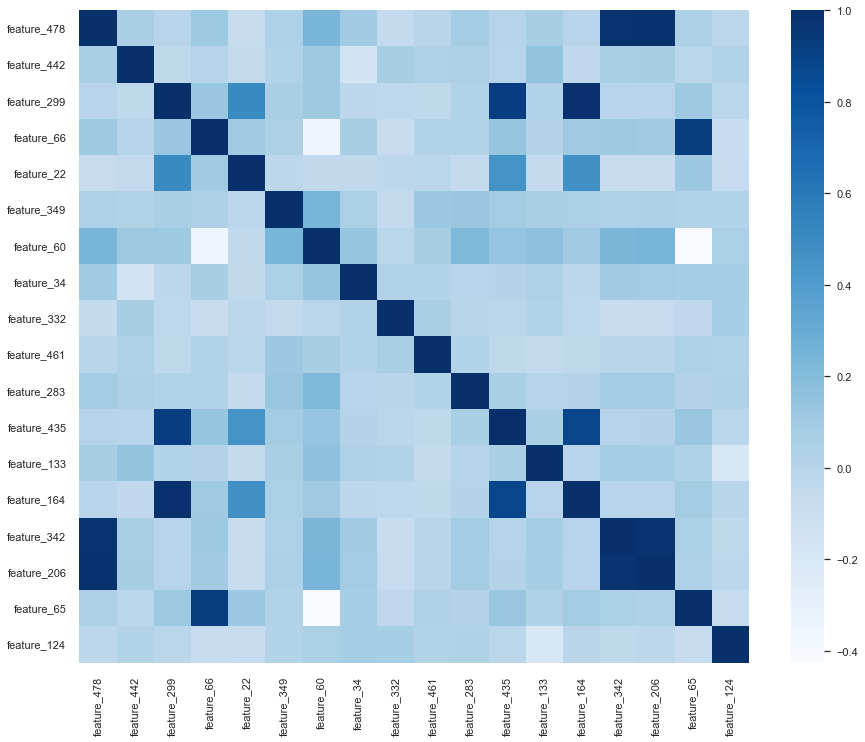

In [ ]:
sns.set(rc = {'figure.figsize':(15,12)})

X_trainshap.corr()
sns.heatmap(X_trainshap.corr(),cmap="Blues")

In [ ]:
modelshap = RandomForestClassifier(n_jobs=-1,n_estimators=100, max_depth=5, random_state=100)
modelshap.fit(retransformed_train,y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=100)

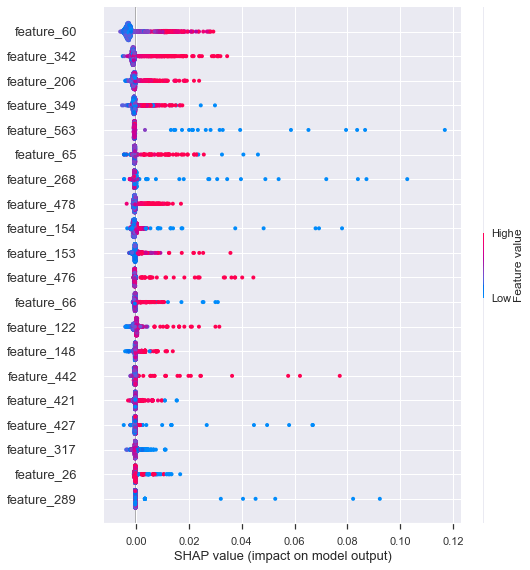

In [ ]:
import shap # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(modelshap)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(retransformed_train)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], retransformed_train)

# Preparation of test data

In [ ]:
x_test_1 = x_test.loc[:,x_train.columns]

In [ ]:
x_test_1

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_581,feature_582,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,feature_590
1044,3031.22,2538.56,2211.5222,1079.7336,0.8126,100.0,105.1278,0.1190,1.4615,-0.0109,...,0.0060,67.6124,0.4998,0.0097,0.0028,1.9366,0.0257,0.0174,0.0060,67.6124
607,3032.07,2477.72,2172.4000,1148.4101,1.2614,100.0,102.4522,0.1227,1.4444,-0.0014,...,NaN,NaN,0.5027,0.0243,0.0047,4.8336,0.0199,0.0159,0.0048,79.7752
1332,3045.48,2408.85,2223.0444,1194.5986,1.2016,100.0,112.5811,0.1229,1.3838,-0.0125,...,NaN,NaN,0.4990,0.0137,0.0032,2.7392,0.0230,0.0210,0.0053,91.4264
1220,2973.99,2574.34,2226.4667,1591.2235,2.1717,100.0,90.3111,0.1219,1.4844,-0.0288,...,0.0032,54.1279,0.5030,0.0113,0.0035,2.2398,0.0207,0.0112,0.0032,54.1279
859,2919.71,2420.32,2134.7445,1244.2899,1.1827,100.0,99.5133,0.1249,1.3331,-0.0126,...,NaN,NaN,0.4938,0.0106,0.0028,2.1418,0.0220,0.0143,0.0045,65.2186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,2998.01,2479.77,2189.9667,1046.6212,0.8662,100.0,102.3622,0.1208,1.3952,-0.0198,...,NaN,NaN,0.4958,0.0115,0.0031,2.3185,0.0280,0.0078,0.0022,27.7601
1545,3100.19,2490.60,2212.8445,1068.5644,1.7835,100.0,113.8833,0.1249,1.4294,-0.0014,...,0.0070,402.6874,0.4951,0.0165,0.0051,3.3383,0.0063,0.0252,0.0070,402.6874
54,2950.46,2398.44,2180.6778,1230.6762,1.4095,100.0,103.3778,0.1205,1.6486,-0.0239,...,0.0019,21.9917,0.4967,0.0152,0.0040,3.0587,0.0247,0.0054,0.0019,21.9917
1051,3012.45,2422.48,2208.5222,1838.7054,1.1571,100.0,95.2056,0.1249,1.4939,0.0096,...,NaN,NaN,0.4979,0.0120,0.0030,2.4101,0.0084,0.0097,0.0038,116.1088


In [ ]:
x_test_2= x_test_1.loc[:,x_train_new.columns]

In [ ]:
x_test_2

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_581,feature_582,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,feature_590
1044,3031.22,2538.56,2211.5222,1079.7336,0.8126,100.0,105.1278,0.1190,1.4615,-0.0109,...,0.0060,67.6124,0.4998,0.0097,0.0028,1.9366,0.0257,0.0174,0.0060,67.6124
607,3032.07,2477.72,2172.4000,1148.4101,1.2614,100.0,102.4522,0.1227,1.4444,-0.0014,...,NaN,NaN,0.5027,0.0243,0.0047,4.8336,0.0199,0.0159,0.0048,79.7752
1332,3045.48,2408.85,2223.0444,1194.5986,1.2016,100.0,112.5811,0.1229,1.3838,-0.0125,...,NaN,NaN,0.4990,0.0137,0.0032,2.7392,0.0230,0.0210,0.0053,91.4264
1220,2973.99,2574.34,2226.4667,1591.2235,2.1717,100.0,90.3111,0.1219,1.4844,-0.0288,...,0.0032,54.1279,0.5030,0.0113,0.0035,2.2398,0.0207,0.0112,0.0032,54.1279
859,2919.71,2420.32,2134.7445,1244.2899,1.1827,100.0,99.5133,0.1249,1.3331,-0.0126,...,NaN,NaN,0.4938,0.0106,0.0028,2.1418,0.0220,0.0143,0.0045,65.2186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,2998.01,2479.77,2189.9667,1046.6212,0.8662,100.0,102.3622,0.1208,1.3952,-0.0198,...,NaN,NaN,0.4958,0.0115,0.0031,2.3185,0.0280,0.0078,0.0022,27.7601
1545,3100.19,2490.60,2212.8445,1068.5644,1.7835,100.0,113.8833,0.1249,1.4294,-0.0014,...,0.0070,402.6874,0.4951,0.0165,0.0051,3.3383,0.0063,0.0252,0.0070,402.6874
54,2950.46,2398.44,2180.6778,1230.6762,1.4095,100.0,103.3778,0.1205,1.6486,-0.0239,...,0.0019,21.9917,0.4967,0.0152,0.0040,3.0587,0.0247,0.0054,0.0019,21.9917
1051,3012.45,2422.48,2208.5222,1838.7054,1.1571,100.0,95.2056,0.1249,1.4939,0.0096,...,NaN,NaN,0.4979,0.0120,0.0030,2.4101,0.0084,0.0097,0.0038,116.1088


In [ ]:
x_test= x_test_2.loc[:,x_train_new_2.columns]

In [ ]:
zscore(x_test,x_test.columns,3)

In [ ]:
x_test.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_7,feature_8,feature_9,feature_10,feature_11,...,feature_581,feature_582,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,feature_590
count,313.000000,313.000000,310.000000,310.000000,310.000000,310.000000,311.000000,313.000000,313.000000,313.000000,...,120.000000,120.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,3015.668473,2493.883826,2201.779791,1389.420409,1.951267,101.326701,0.122121,1.457232,-0.000985,-0.000065,...,0.005451,99.209715,0.500038,0.014858,0.003766,2.971533,0.021061,0.016864,0.005372,101.461818
std,72.048492,83.078019,27.388107,411.533556,10.959894,6.216757,0.004163,0.073126,0.015327,0.009394,...,0.002759,81.813640,0.003295,0.004549,0.000930,0.909199,0.011477,0.008696,0.002723,90.563801
min,2797.719402,2238.092339,2118.633988,847.797600,0.721700,82.561126,0.084861,1.236283,-0.039300,-0.028498,...,0.001000,0.000000,0.491900,0.007300,0.001700,1.471600,-0.015155,0.003200,0.001000,0.000000
25%,2968.330000,2452.280000,2183.449975,1079.924825,1.020325,98.280575,0.121100,1.414500,-0.010800,-0.005800,...,0.003400,45.306775,0.498100,0.011625,0.003100,2.323425,0.014000,0.010400,0.003300,44.135650
50%,3011.840000,2492.810000,2201.350000,1287.884450,1.300100,101.587800,0.122400,1.457000,-0.001600,0.000500,...,0.004950,76.268450,0.500000,0.013950,0.003700,2.793300,0.019950,0.015000,0.004850,74.567850
75%,3057.560000,2535.710000,2218.427750,1586.947600,1.529600,104.854400,0.123950,1.505700,0.008900,0.006300,...,0.006525,117.079075,0.502000,0.017100,0.004100,3.436750,0.027500,0.021200,0.006750,116.108800
max,3233.891397,2749.222869,2285.113388,2788.577783,194.188563,120.109605,0.127600,1.648600,0.045054,0.028334,...,0.014508,355.944816,0.509100,0.030534,0.006790,6.107756,0.057571,0.044673,0.014229,403.089863


## imputation

### KNN Imputation

In [ ]:
#no need to scale for test data
#x_test_scaled = pd.DataFrame(scaler.fit_transform(x_test_3s), columns=x_test_3s.columns)
#x_test_scaled

In [ ]:
imputed_test = pd.DataFrame(knn.transform(x_test), columns = x_test.columns)

In [ ]:
imputed_test.isna().any().any()

False

In [ ]:
imputed_test

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_7,feature_8,feature_9,feature_10,feature_11,...,feature_581,feature_582,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,feature_590
0,3031.22,2538.56,2211.5222,1079.7336,0.8126,105.1278,0.1190,1.4615,-0.0109,0.0140,...,0.006000,67.612400,0.4998,0.0097,0.0028,1.9366,0.0257,0.0174,0.0060,67.6124
1,3032.07,2477.72,2172.4000,1148.4101,1.2614,102.4522,0.1227,1.4444,-0.0014,0.0001,...,0.385922,0.387956,0.5027,0.0243,0.0047,4.8336,0.0199,0.0159,0.0048,79.7752
2,3045.48,2408.85,2223.0444,1194.5986,1.2016,112.5811,0.1229,1.3838,-0.0125,0.0073,...,0.293503,0.324256,0.4990,0.0137,0.0032,2.7392,0.0230,0.0210,0.0053,91.4264
3,2973.99,2574.34,2226.4667,1591.2235,2.1717,90.3111,0.1219,1.4844,-0.0288,-0.0029,...,0.003200,54.127900,0.5030,0.0113,0.0035,2.2398,0.0207,0.0112,0.0032,54.1279
4,2919.71,2420.32,2134.7445,1244.2899,1.1827,99.5133,0.1249,1.3331,-0.0126,0.0076,...,0.242540,0.225742,0.4938,0.0106,0.0028,2.1418,0.0220,0.0143,0.0045,65.2186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,2998.01,2479.77,2189.9667,1046.6212,0.8662,102.3622,0.1208,1.3952,-0.0198,0.0026,...,0.352785,0.500535,0.4958,0.0115,0.0031,2.3185,0.0280,0.0078,0.0022,27.7601
310,3100.19,2490.60,2212.8445,1068.5644,1.7835,113.8833,0.1249,1.4294,-0.0014,0.0135,...,0.007000,355.944816,0.4951,0.0165,0.0051,3.3383,0.0063,0.0252,0.0070,402.6874
311,2950.46,2398.44,2180.6778,1230.6762,1.4095,103.3778,0.1205,1.6486,-0.0239,0.0031,...,0.001900,21.991700,0.4967,0.0152,0.0040,3.0587,0.0247,0.0054,0.0019,21.9917
312,3012.45,2422.48,2208.5222,1838.7054,1.1571,95.2056,0.1249,1.4939,0.0096,0.0071,...,0.448334,0.492187,0.4979,0.0120,0.0030,2.4101,0.0084,0.0097,0.0038,116.1088


## Unscaling of imputed test and filtering the features of test dataset

In [ ]:
X_test = imputed_test.filter(X_trainshap.columns)

In [ ]:
X_test

,feature_478,feature_442,feature_299,feature_66,feature_22,feature_349,feature_60,feature_34,feature_332,feature_461,feature_283,feature_435,feature_133,feature_164,feature_342,feature_206,feature_65,feature_124
0,6.5927,1.1623,0.042900,28.1969,-5287.50,0.018700,-1.2400,9.4336,0.0686,29.8359,0.0068,7.511000,2.4723,0.09800,3.4391,9.94,21.2400,15.67
1,11.9817,0.7663,0.028000,30.4891,-5613.50,0.026900,-4.1518,8.7219,0.0868,31.0326,0.0019,5.270300,2.3289,0.06800,4.7775,17.13,24.1518,15.94
2,6.2464,0.5858,0.090000,33.1448,-5489.75,0.020800,-5.1491,9.1637,0.0321,16.3653,0.0040,15.010700,2.2752,0.19300,2.7074,9.20,25.1491,15.89
3,3.7154,0.9136,0.078600,31.1416,-5100.00,0.028300,-5.6500,8.8097,0.0832,12.9610,0.0028,13.824200,2.2053,0.18400,1.7046,5.49,25.6500,16.08
4,4.6771,0.8834,0.066400,20.2491,-5416.50,0.028800,5.3973,8.2720,0.0979,25.5687,0.0063,12.209000,2.2831,0.15600,2.4584,6.95,16.3450,15.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,3.6998,0.7053,0.035100,28.4909,-5012.75,0.018400,-1.4027,8.7635,0.0699,43.4743,0.0055,5.868900,2.2616,0.07700,1.7381,5.51,21.4027,15.86
310,4.1743,0.7584,0.083500,21.7822,-5338.75,0.264522,4.6964,8.1728,0.1002,33.6993,0.0039,13.499200,2.2886,0.17900,2.0250,6.25,15.3036,15.73
311,6.4725,0.7898,0.235924,26.3171,-4520.75,0.021100,20.0455,9.1784,0.0779,25.6289,0.0104,74.202863,2.3179,0.48084,2.5763,9.60,19.9545,15.92
312,4.4298,0.7724,0.111000,27.9241,-5336.75,0.022900,-2.1409,8.7402,0.1014,28.5461,0.0018,19.043900,2.4253,0.24700,2.0725,6.62,22.1409,15.77


In [ ]:
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train_3s), columns=x_train_3s.columns)

# Balancing 

In [ ]:
def Sampling(X_train, y_train, sampler):
    
    #SMOTE
    if sampler == 'SMOTE':
        sampler = SMOTE(random_state=100,sampling_strategy=1.0)    
    
    #ROSE
    if sampler == 'ROSE':
        sampler = RandomOverSampler(random_state=100, shrinkage=1,sampling_strategy=1.0)

    #ADASYN
    if sampler == 'ADASYN':
        sampler = ADASYN(random_state=100,sampling_strategy=1.0)
    

    #SMOTTEENN
    if sampler == 'SMOTEENN' :
        sampler = SMOTEENN(random_state=100)
        
        
    #Random under Sampling
    if sampler == "randomunder":
        sampler = RandomUnderSampler(random_state=100,sampling_strategy=1.0)

    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    counter = Counter(y_resampled)
    print(counter)
    return X_resampled, y_resampled

In [ ]:
X_resampled, y_resampled = Sampling(X_trainshap, y_train,'SMOTEENN')

Counter({1: 1018, -1: 755})


In [ ]:
y_test.value_counts(normalize=True)*100

-1    93.312102
 1     6.687898
Name: status, dtype: float64

In [ ]:
'y_resampled.value_counts(normalize=True)*100

SyntaxError: EOL while scanning string literal (Temp/ipykernel_8728/1768850233.py, line 1)

# Building Model

Grid Search and cross validation for Random Forest

In [ ]:
'np.random.seed(42)

In [ ]:
# Create the random grid
rf_params = {'n_estimators': [250],
               'criterion' : ['entropy'],
               'max_features': ['sqrt'],
               'max_depth': [7],
               'min_samples_split': [50],
               'min_samples_leaf': [1],
               'class_weight' : ['balanced_subsample'],
               'max_samples' : [400]
              }

In [ ]:
from sklearn.metrics import f1_score, matthews_corrcoef, roc_auc_score

In [ ]:
# Create a base model to tune
rf = RandomForestClassifier(random_state=150)

# Grid Search
rf_random = GridSearchCV(estimator = rf, param_grid = rf_params, scoring='roc_auc', cv = 5, verbose=1)

# Fit the random search model
rf_random.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=150),
             param_grid={'class_weight': ['balanced_subsample'],
                         'criterion': ['entropy'], 'max_depth': [7],
                         'max_features': ['sqrt'], 'max_samples': [400],
                         'min_samples_leaf': [1], 'min_samples_split': [50],
                         'n_estimators': [250]},
             scoring='roc_auc', verbose=1)

In [ ]:
# Printing the best Parameters and best estimator

#Printing the best estimator

print('\n Best estimator:')
print(rf_random.best_estimator_)

print('\n Best hyperparameters:')
print(rf_random.best_params_)


 Best estimator:
RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=7, max_features='sqrt', max_samples=400,
                       min_samples_split=50, n_estimators=250,
                       random_state=150)

 Best hyperparameters:
{'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'max_samples': 400, 'min_samples_leaf': 1, 'min_samples_split': 50, 'n_estimators': 250}


In [ ]:
# Evaluation using Startified K Fold cross validation
cv = StratifiedKFold(n_splits=5)
scores = cross_val_score(rf_random.best_estimator_, X_resampled, y_resampled, cv=cv, scoring = 'recall')
print(scores.mean())
# fit
rf=rf_random.best_estimator_.fit(X_resampled, y_resampled)    
# predict
y_pred_test = rf_random.best_estimator_.predict(X_test)
# View accuracy score
accuracyFinal = accuracy_score(y_test, y_pred_test)
print('Test Accuracy : ', accuracyFinal)

0.8359557616149909
Test Accuracy :  0.7802547770700637


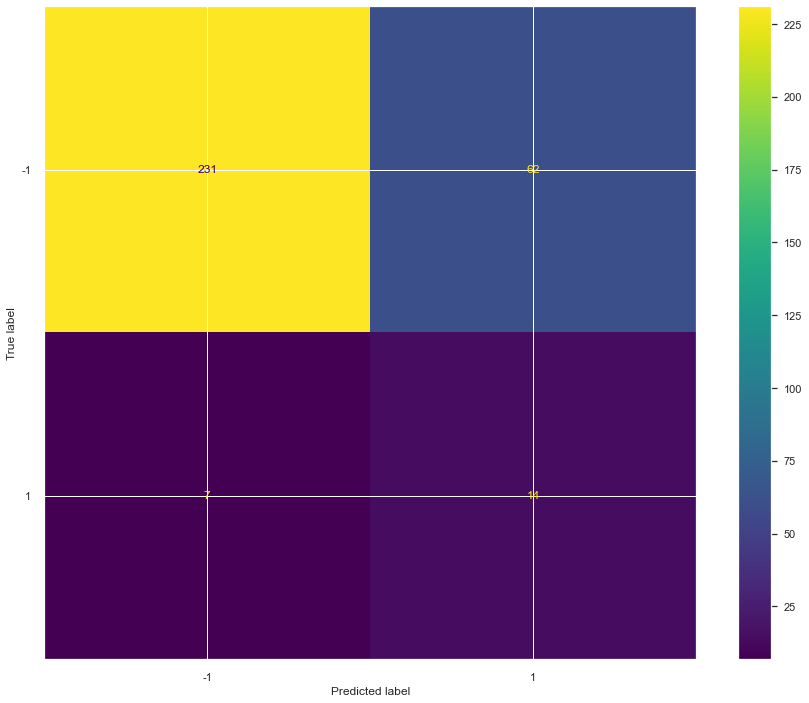

              precision    recall  f1-score   support

          -1       0.97      0.79      0.87       293
           1       0.18      0.67      0.29        21

    accuracy                           0.78       314
   macro avg       0.58      0.73      0.58       314
weighted avg       0.92      0.78      0.83       314



In [ ]:
# Plot confussion matrix
cm = confusion_matrix(y_test, y_pred_test, labels=rf_random.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_random.best_estimator_.classes_)
disp.plot()
plt.show()
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_test)) 

In [ ]:
df=pd.DataFrame(rf_random.cv_results_)
df.to_csv('cv_results.csv')

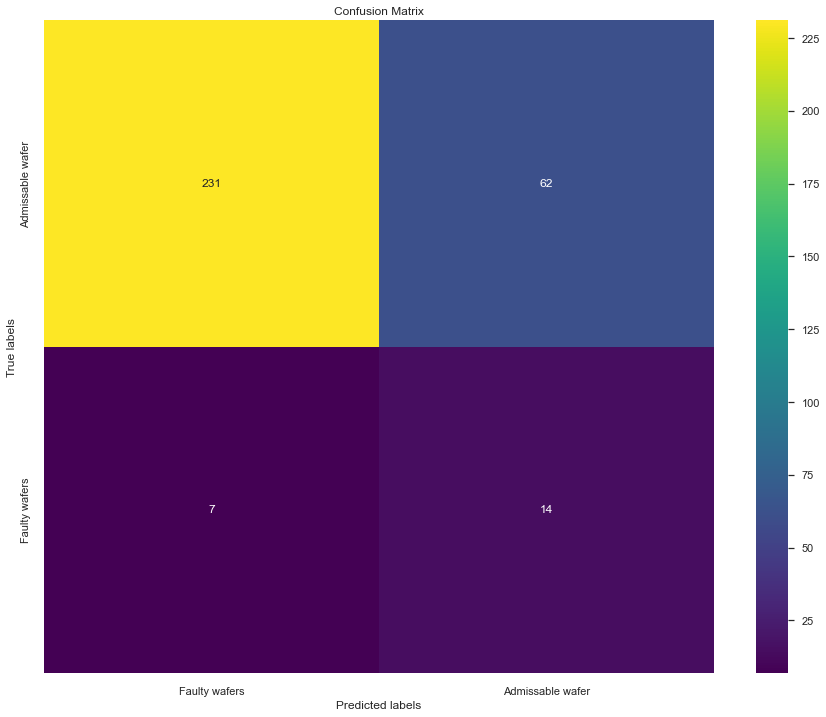

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='viridis')  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Faulty wafers', 'Admissable wafer']); ax.yaxis.set_ticklabels(['Admissable wafer', 'Faulty wafers',]);

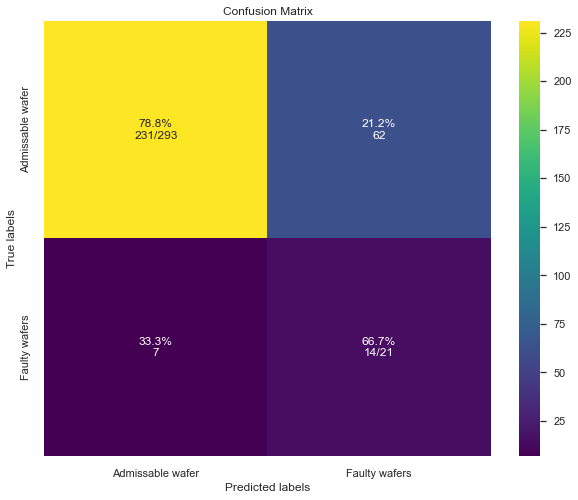

In [ ]:
def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(10,10)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax, cmap='viridis')
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Admissable wafer','Faulty wafers']); ax.yaxis.set_ticklabels(['Admissable wafer', 'Faulty wafers',]);
    #plt.savefig(filename)
    plt.show()

cm_analysis(y_test, y_pred_test, rf_random.classes_, ymap=None, figsize=(10,8))

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score, roc_auc_score, log_loss, cohen_kappa_score

In [ ]:
def run_model(X_train, y_train, X_test, y_test):

    model=rf_random.best_estimator_.fit(X_resampled, y_resampled)  

    #For TEST SPLIT
    y_pred= model.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    accuracy= accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred) ##
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    specificity = cf_matrix[1][1] / ( cf_matrix[1][1] + cf_matrix[1][0] )
    auc = roc_auc_score(y_test, y_pred)
    GINI = (2 * auc) - 1
    type_1_error_FP = cf_matrix[0][1]
    type_2_error_FN = cf_matrix[1][0]
    log_loss_ = log_loss(y_test, y_pred)
    cohen_kappa_score_ = cohen_kappa_score(y_test, y_pred)
    #Note by default 1 is the positive label. Therefore, -1 is negative
    #bad waffe -> 2 line of matrix -> POSITIVE -> data = -1

    #For TRAIN SPLIT
    y_pred_train= model.predict(X_train)
    cf_matrix_train = confusion_matrix(y_train, y_pred_train)
    accuracy_train= accuracy_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train) ##
    precision_train = precision_score(y_train, y_pred_train)
    recall_train = recall_score(y_train, y_pred_train)
    specificity_train = cf_matrix_train[1][1] / ( cf_matrix_train[1][1] + cf_matrix_train[1][0] )
    auc_train = roc_auc_score(y_train, y_pred_train)
    type_1_error_FP_train = cf_matrix_train[0][1]
    type_2_error_FN_train = cf_matrix_train[1][0]




    return cf_matrix, accuracy, f1, precision, recall, specificity, type_1_error_FP, type_2_error_FN, auc,GINI, log_loss_,cohen_kappa_score_, cf_matrix_train, accuracy_train, f1_train, precision_train, recall_train, specificity_train, type_1_error_FP_train, type_2_error_FN_train, auc_train


In [ ]:
run_model(X_resampled, y_resampled, X_test, y_test)

(array([[231,  62],
        [  7,  14]], dtype=int64),
 0.7802547770700637,
 0.28865979381443296,
 0.18421052631578946,
 0.6666666666666666,
 0.6666666666666666,
 62,
 7,
 0.7275312855517633,
 0.45506257110352655,
 7.589889000922005,
 0.2053839947186974,
 array([[664,  91],
        [155, 863]], dtype=int64),
 0.8612521150592216,
 0.8752535496957404,
 0.9046121593291404,
 0.8477406679764243,
 0.8477406679764243,
 91,
 155,
 0.8636054333259605)

In [ ]:
def plot_search_results(grid):
    """
    Params: 
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = rf.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(rf_random.best_params_.keys())
    for p_k, p_v in rf_random.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=rf_random.rf_params

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

In [ ]:
feature_list = np.array(X_trainshap.columns)
df=pd.DataFrame(rf_random.cv_results_)

df.to_csv('cv_results.csv')

In [ ]:
grid_scores = rf_random.cv_results_

In [ ]:
from sklearn_evaluation import plot

In [ ]:
from sklearn_evaluation.plot import grid_search

In [ ]:
#plot.grid_search(rf_random.cv_results_, change='n_estimators', kind='bar')

In [ ]:
from sklearn.metrics import roc_curve

n_estimator

In [ ]:
n_estimators = [30,50, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(X_resampled, y_resampled)
   train_pred = rf.predict(X_resampled)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_resampled, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label= 'Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

NameError: name 'auc' is not defined

max_depth

In [ ]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(X_resampled, y_resampled)
   train_pred = rf.predict(X_resampled)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_resampled, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

min_samples_split/percantage wise

In [ ]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   rf = RandomForestClassifier(min_samples_split=min_samples_split)
   rf.fit(X_resampled, y_resampled)
   train_pred = rf.predict(X_resampled)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_resampled, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

min_samples_leaf

In [ ]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
   rf.fit(X_resampled, y_resampled)
   train_pred = rf.predict(X_resampled)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_resampled, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score


In [ ]:
display = PrecisionRecallDisplay.from_estimator(
    rf_random, X_test, y_test
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 9))
ax1.grid(False)
ax2.grid(False)
display.plot(ax=ax1, color='teal')
metrics.RocCurveDisplay.from_estimator(rf_random.best_estimator_, X_test, y_test).plot(ax=ax2,color='teal')

plt.show()

In [ ]:

# precision-recall curve and f1 for an imbalanced dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

# predict probabilities
rf_probs = rf_random.best_estimator_.predict_proba(X_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# predict class values
yhat = rf_random.best_estimator_.predict(X_test)
# calculate precision and recall for each threshold
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probs)
# calculate scores
rf_f1, lr_auc = f1_score(y_test, yhat), auc(rf_recall, rf_precision)
# summarize scores
print('Random_forest: f1=%.3f auc=%.3f' % (rf_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(rf_recall, rf_precision, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
y_score = rf_random.predict_proba(X_test)[:, 1]

In [ ]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color ='purple')


#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
ax.set_style("white")

#display plot
plt.show()

NameError: name 'precision_recall_curve' is not defined

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
from sklearn.metrics import roc_curve
ns_probs = [0 for _ in range(len(y_test))]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, rf_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
# ROC curve
metrics.RocCurveDisplay.from_estimator(rf_random.best_estimator_, X_test, y_test)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score, roc_auc_score, log_loss, cohen_kappa_score

In [ ]:
def run_model(X_train, y_train, X_test, y_test):

    model=rf_random.best_estimator_.fit(X_resampled, y_resampled)  

    #For TEST SPLIT
    y_pred= model.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    accuracy= accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred) ##
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    specificity = cf_matrix[1][1] / ( cf_matrix[1][1] + cf_matrix[1][0] )
    auc = roc_auc_score(y_test, y_pred)
    type_1_error_FP = cf_matrix[0][1]
    type_2_error_FN = cf_matrix[1][0]
    log_loss_ = log_loss(y_test, y_pred)
    cohen_kappa_score_ = cohen_kappa_score(y_test, y_pred)
    #Note by default 1 is the positive label. Therefore, -1 is negative
    #bad waffe -> 2 line of matrix -> POSITIVE -> data = -1

    #For TRAIN SPLIT
    y_pred_train= model.predict(X_train)
    cf_matrix_train = confusion_matrix(y_train, y_pred_train)
    accuracy_train= accuracy_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train) ##
    precision_train = precision_score(y_train, y_pred_train)
    recall_train = recall_score(y_train, y_pred_train)
    specificity_train = cf_matrix_train[1][1] / ( cf_matrix_train[1][1] + cf_matrix_train[1][0] )
    auc_train = roc_auc_score(y_train, y_pred_train)
    type_1_error_FP_train = cf_matrix_train[0][1]
    type_2_error_FN_train = cf_matrix_train[1][0]




    return cf_matrix, accuracy, f1, precision, recall, specificity, type_1_error_FP, type_2_error_FN, auc,log_loss_,cohen_kappa_score_, cf_matrix_train, accuracy_train, f1_train, precision_train, recall_train, specificity_train, type_1_error_FP_train, type_2_error_FN_train, auc_train


In [ ]:

run_model(X_resampled, y_resampled, X_test, y_test)

In [ ]:
df_result = pd.DataFrame(randomf, columns = ['cf_matrix', 'accuracy', 'f1', 'precision', 'recall', 'sensitivity', 'type_1_error_FP', 'type_2_error_FN', 'auc', 'log_loss_','cohen_kappa_score_','cf_matrix_train', 'accuracy_train', 'f1_train', 'precision_train', 'recall_train', 'sensitivity_train', 'type_1_error_FP_train', 'type_2_error_FN_train', 'auc_train'])
df_result.to_csv('cv_results.csv')
#df= df.sort_values()


Grid Search and Cross Validation for Gradient Boosting

In [ ]:
# defining parameter range
'param_grad = {
    "loss":["deviance"],
    "learning_rate": [0.05],
    "min_samples_split": [2],
    "min_samples_leaf": [1],
    "max_depth":[5],
    "max_features":["log2"],
    "criterion": ["friedman_mse"],
    "subsample":[1],
    "n_estimators":[750]
    }

SyntaxError: EOL while scanning string literal (Temp/ipykernel_8728/714240598.py, line 2)

In [ ]:
'param_grad = {
    "loss":["deviance"],
    "learning_rate": [ 0.05, 0.075, 0.1],
    "min_samples_split": np.linspace(0.1, 0.5),
    "min_samples_leaf": np.linspace(0.1, 0.5),
    "max_depth":[3,5,8],
    "max_features":["sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.8, 0.9],
    "n_estimators":[10]
    }

SyntaxError: EOL while scanning string literal (Temp/ipykernel_12452/4293225363.py, line 1)

In [ ]:
'param_grad = {
    "loss":["deviance"],
    "learning_rate": [ 0.05, 0.075, 0.1,],
    "min_samples_split": [100,150,1,2,3],
    "min_samples_leaf": [30,60,1],
    "max_depth":[3,5,8],
    "max_features":["sqrt","log2"],
    "criterion": ["friedman_mse"],
    "subsample":[0.8, 0.9,1 ],
    "n_estimators":[500,800,1000,1200]
    }

In [ ]:
param_grad = {
    "loss":['squared_error','log_loss',"deviance"],
    "learning_rate": [0.01, 0.05, 0.1, 0.20, 0.25],
    "min_samples_split": [2,3],
    "min_samples_leaf": [1],
    "max_depth":[3,5,8,12],
    "max_features":["log2",'sqrt'],
    "criterion": ["friedman_mse"],
    "subsample":[1],
    "n_estimators":[100,300,500,800,1000]
    }

In [ ]:
'param_grad = {
    "loss":['log_loss'],
    "learning_rate": [0.05],
    "min_samples_split": [2,3],
    "min_samples_leaf": [1],
    "max_depth":[5,8],
    "max_features":["log2",'sqrt'],
    "criterion": ["friedman_mse"],
    "subsample":[1],
    "n_estimators":[10,20,30,50,100,200]
    }

SyntaxError: EOL while scanning string literal (Temp/ipykernel_8728/1396465051.py, line 1)

In [ ]:
grid= GridSearchCV(GradientBoostingClassifier(),param_grid= param_grad, cv=5, verbose=1, n_jobs=-1, scoring='precision')
 
# fitting the model for grid search
grid.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse'],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.25],
                         'loss': ['squared_error', 'log_loss', 'deviance'],
                         'max_depth': [3, 5, 8, 12],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1], 'min_samples_split': [2, 3],
                         'n_estimators': [100, 300, 500, 800, 1000],
                         'subsample': [1]},
             scoring='precision', verbose=1)

In [ ]:

# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'criterion': 'friedman_mse', 'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 1000, 'subsample': 1}
GradientBoostingClassifier(learning_rate=0.2, max_depth=12, max_features='sqrt',
                           min_samples_split=3, n_estimators=1000, subsample=1)


In [ ]:
# Evaluation using Startified K Fold cross validation
cv = StratifiedKFold(n_splits=5)
scores = cross_val_score(grid.best_estimator_, X_resampled, y_resampled, cv=cv, scoring = 'precision')
print(scores.mean())
# fit
grad=grid.best_estimator_.fit(X_resampled, y_resampled)    
# predict
y_pred_test = grid.best_estimator_.predict(X_test)
# View accuracy score
accuracyFinal = accuracy_score(y_test, y_pred_test)
print('Test Accuracy : ', accuracyFinal)

0.9609656353764688
Test Accuracy :  0.8885350318471338


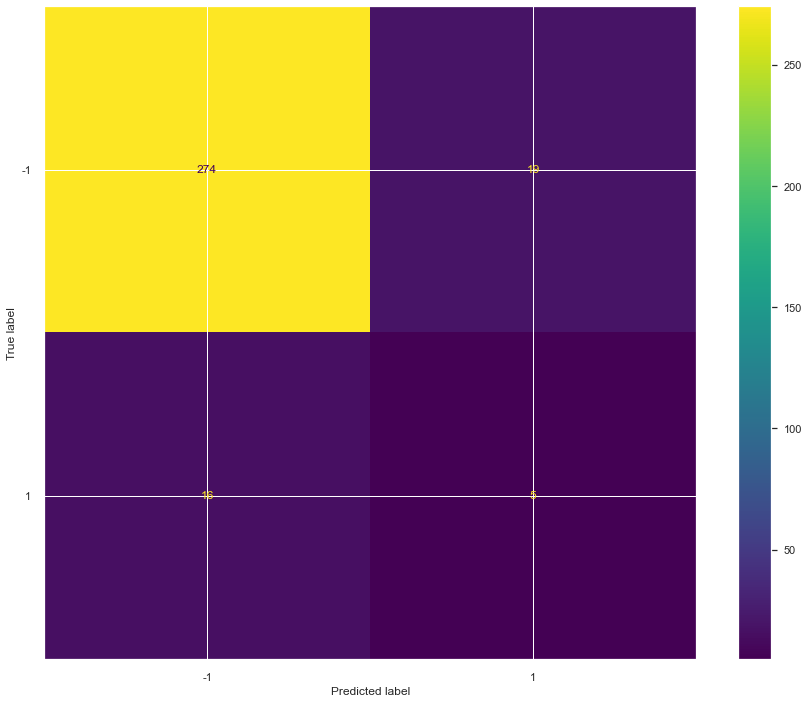

              precision    recall  f1-score   support

          -1       0.94      0.94      0.94       293
           1       0.21      0.24      0.22        21

    accuracy                           0.89       314
   macro avg       0.58      0.59      0.58       314
weighted avg       0.90      0.89      0.89       314



In [ ]:
# Plot confussion matrix
cm = confusion_matrix(y_test, y_pred_test, labels=grid.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid.best_estimator_.classes_)
disp.plot()
plt.show()
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_test)) 

In [ ]:
from sklearn import datasets, linear_model, tree, ensemble

In [ ]:
def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(10,10)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize,plt.rcParams['font.size'] = 18)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax, cmap='viridis')
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Admissable wafer','Faulty wafers']); ax.yaxis.set_ticklabels(['Admissable wafer', 'Faulty wafers',]);
    #plt.savefig(filename)
    plt.show()

cm_analysis(y_test, y_pred_test, grid.classes_, ymap=None, figsize=(10,8))

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (Temp/ipykernel_8728/500022322.py, line 40)

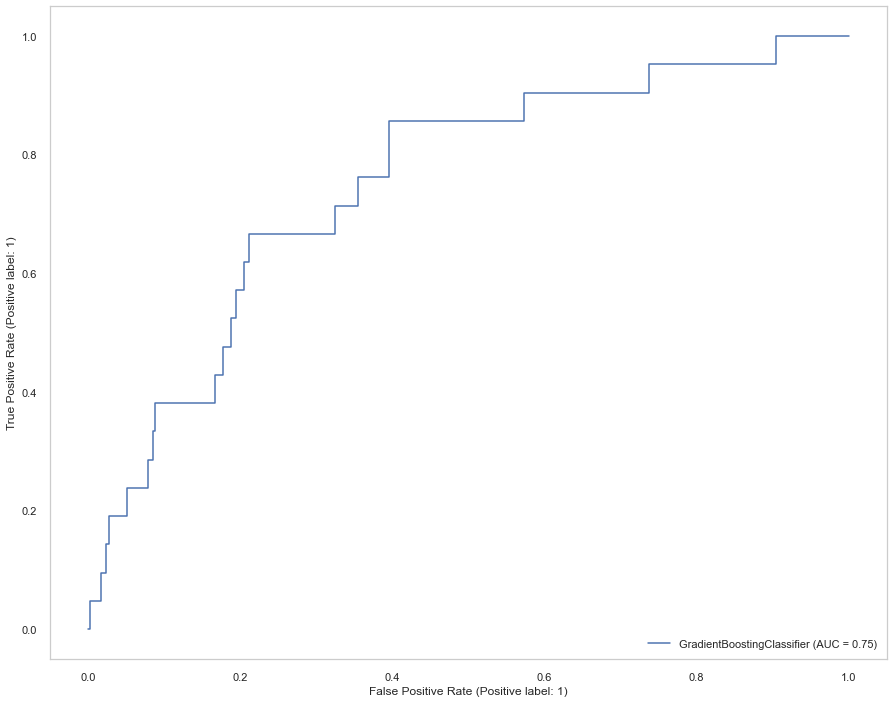

In [ ]:
# ROC curve
metrics.RocCurveDisplay.from_estimator(grid.best_estimator_, X_test, y_test)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score, roc_auc_score, log_loss, cohen_kappa_score

In [ ]:
def run_model(X_train, y_train, X_test, y_test):

    model=grid.best_estimator_.fit(X_resampled, y_resampled)  

    #For TEST SPLIT
    y_pred= model.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    accuracy= accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred) ##
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    specificity = cf_matrix[1][1] / ( cf_matrix[1][1] + cf_matrix[1][0] )
    auc = roc_auc_score(y_test, y_pred)
    type_1_error_FP = cf_matrix[0][1]
    type_2_error_FN = cf_matrix[1][0]
    log_loss_ = log_loss(y_test, y_pred)
    cohen_kappa_score_ = cohen_kappa_score(y_test, y_pred)
    #Note by default 1 is the positive label. Therefore, -1 is negative
    #bad waffe -> 2 line of matrix -> POSITIVE -> data = -1

    #For TRAIN SPLIT
    y_pred_train= model.predict(X_train)
    cf_matrix_train = confusion_matrix(y_train, y_pred_train)
    accuracy_train= accuracy_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train) ##
    precision_train = precision_score(y_train, y_pred_train)
    recall_train = recall_score(y_train, y_pred_train)
    specificity_train = cf_matrix_train[1][1] / ( cf_matrix_train[1][1] + cf_matrix_train[1][0] )
    auc_train = roc_auc_score(y_train, y_pred_train)
    type_1_error_FP_train = cf_matrix_train[0][1]
    type_2_error_FN_train = cf_matrix_train[1][0]




    return cf_matrix, accuracy, f1, precision, recall, specificity, type_1_error_FP, type_2_error_FN, auc,log_loss_,cohen_kappa_score_, cf_matrix_train, accuracy_train, f1_train, precision_train, recall_train, specificity_train, type_1_error_FP_train, type_2_error_FN_train, auc_train


In [ ]:
run_model(X_resampled, y_resampled, X_test, y_test)

(array([[243,  50],
        [  8,  13]], dtype=int64),
 0.8152866242038217,
 0.30952380952380953,
 0.20634920634920634,
 0.6190476190476191,
 0.6190476190476191,
 50,
 8,
 0.7241995774418983,
 6.379901308204871,
 0.23253265908133158,
 array([[ 754,    1],
        [   0, 1018]], dtype=int64),
 0.9994359842075579,
 0.9995090819833087,
 0.9990186457311089,
 1.0,
 1.0,
 1,
 0,
 0.9993377483443708)

In [ ]:
# precision-recall curve and f1 for an imbalanced dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

# predict probabilities
grid2 = grad.best_estimator_.predict_proba(X_test)
# keep probabilities for the positive outcome only
grid2 =grid2[:, 1]
# predict class values
yhat = grid2.best_estimator_.predict(X_test)
# calculate precision and recall for each threshold
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probs)
# calculate scores
rf_f1, lr_auc = f1_score(y_test, yhat), auc(rf_recall, rf_precision)
# summarize scores
print('Random_forest: f1=%.3f auc=%.3f' % (rf_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(rf_recall, rf_precision, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

AttributeError: 'numpy.ndarray' object has no attribute 'predict'

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
y_score = grid.predict_proba(X_test)[:, 1]

In [ ]:
#Precision / Recall
metrics.PrecisionRecallDisplay.from_estimator(grid, x_test, y_test, color="purple")
plt.legend(loc="lower right")
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
plt.figure(figsize = (13, 6)
plt.rcParams['font.size'] = 80
sns.set_style("whitegrid", {'axes.grid' : False})
''
# Density plots of the learning rate distributions 
sns.kdeplot(param_grad['learning_rate'], label = 'Gradient Boosting', linewidth = 4, color= 'green', alpha= 0.5)
sns.kdeplot(df['param_learning_rate'], label = 'Grid Search', linewidth = 4,color= 'rebeccapurple', alpha= 0.8)
plt.legend()
plt.xlabel('Learning Rate'); plt.ylabel('Density'); plt.title('Learning Rate Distribution');

SyntaxError: invalid syntax (Temp/ipykernel_19168/449791995.py, line 2)

In [ ]:
'grid.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, max_depth=12,
                           max_features='sqrt', n_estimators=50, subsample=1)

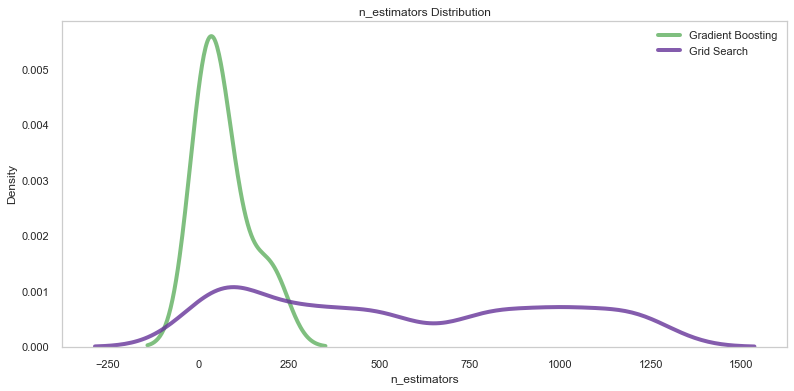

In [ ]:
plt.figure(figsize = (13, 6))
plt.rcParams['font.size'] = 80
sns.set_style("whitegrid", {'axes.grid' : False})
''
# Density plots of the learning rate distributions  
sns.kdeplot(param_grad['n_estimators'], label = 'Gradient Boosting', linewidth = 4, color= 'green', alpha= 0.5)
sns.kdeplot(df['param_n_estimators'], label = 'Grid Search', linewidth = 4,color= 'rebeccapurple', alpha= 0.8)
plt.legend()
plt.xlabel('n_estimators'); plt.ylabel('Density'); plt.title('n_estimators Distribution');

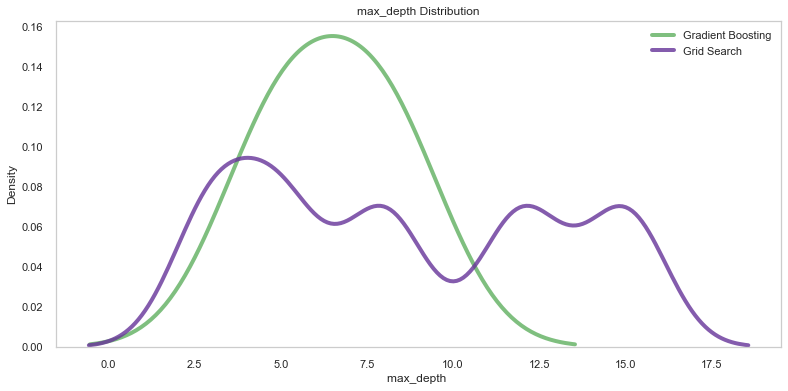

In [ ]:
plt.figure(figsize = (13, 6))
plt.rcParams['font.size'] = 80
sns.set_style("whitegrid", {'axes.grid' : False})
''
# Density plots of the learning rate distributions 
sns.kdeplot(param_grad['max_depth'], label = 'Gradient Boosting', linewidth = 4, color= 'green', alpha= 0.5)
sns.kdeplot(df['param_max_depth'], label = 'Grid Search', linewidth = 4,color= 'rebeccapurple', alpha= 0.8)
plt.legend()
plt.xlabel('max_depth '); plt.ylabel('Density'); plt.title('max_depth Distribution');

In [ ]:
#feature_list = np.array(X_trainshap.columns)
df=pd.DataFrame(grid.cv_results_)
df.to_csv('cv_resultsgrid7.csv')

SyntaxError: EOL while scanning string literal (Temp/ipykernel_19168/2303612710.py, line 2)

NameError: name 'df' is not defined

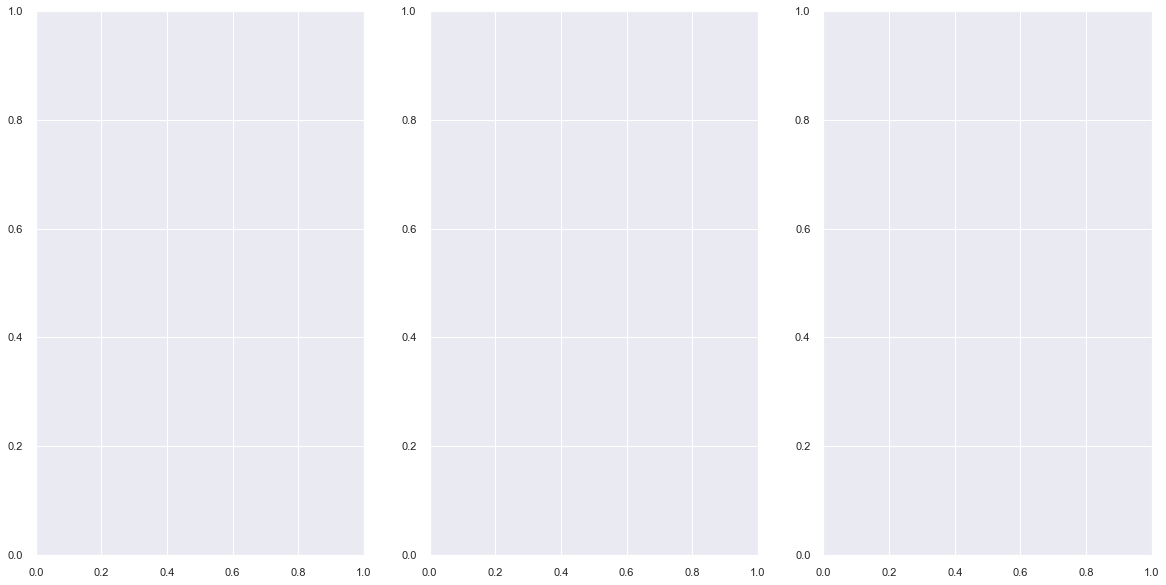

In [ ]:
fig, axs = plt.subplots(1, 3, figsize = (20, 10))
plt.rcParams['font.size'] = 80
i = 0

# Plot of four hyperparameters
for i, hyper in enumerate(['param_learning_rate', 'param_n_estimators', 'param_max_depth']):
        df[hyper] = df[hyper].astype(float)
        # Scatterplot
        sns.regplot(hyper, 'rank_test_score', data = df, ax = axs[i], color = 'rebeccapurple')
        axs[i].scatter(df[hyper], df['rank_test_score'], c = 'mediumseagreen',alpha= 0.5)
        axs[i].set(xlabel = '{}'.format(hyper), ylabel = 'Test Scores', title = 'Test Scores vs {}'.format(hyper));

plt.tight_layout()


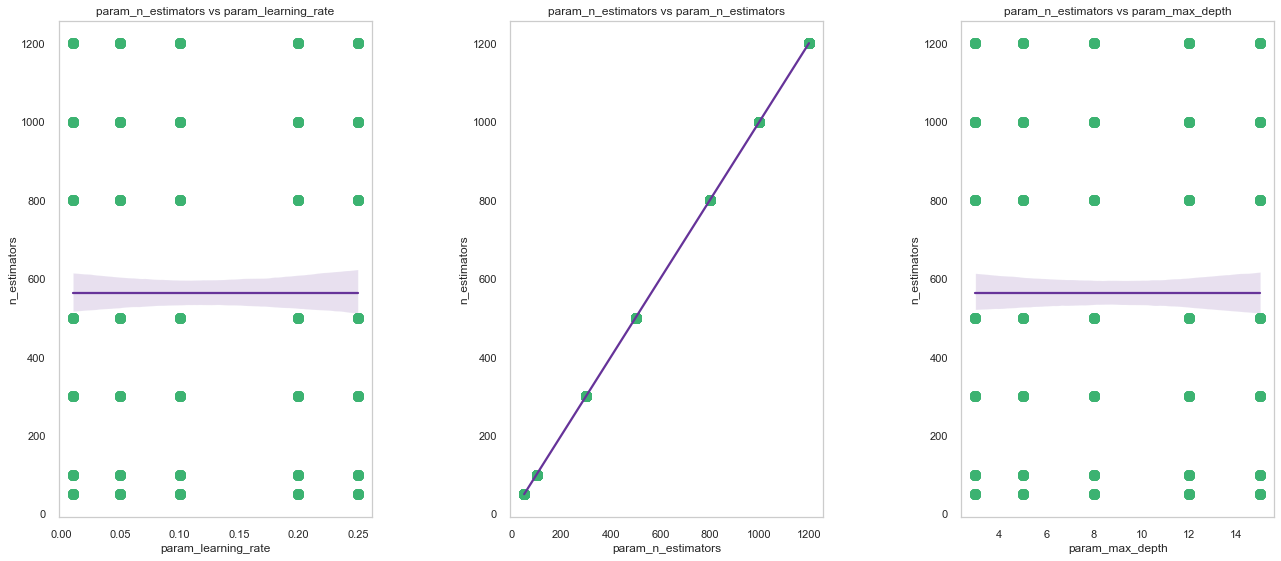

In [ ]:
fig, axs = plt.subplots(1, 3, figsize = (20, 10))
plt.rcParams['font.size'] = 80
i = 0

# Plot of four hyperparameters
for i, hyper in enumerate(['param_learning_rate', 'param_n_estimators', 'param_max_depth']):
        df[hyper] = df[hyper].astype(float)
        # Scatterplot
        sns.regplot(hyper, 'param_n_estimators', data = df, ax = axs[i], color = 'rebeccapurple')
        axs[i].scatter(df[hyper], df['param_n_estimators'], s = 100, c = 'mediumseagreen',alpha= 0.5)
        axs[i].set(xlabel = '{}'.format(hyper), ylabel = 'n_estimators', title = 'param_n_estimators vs {}'.format(hyper));

plt.tight_layout()

xgboosting

In [ ]:
-'import xgboost as xgb

SyntaxError: EOL while scanning string literal (Temp/ipykernel_19168/1644353753.py, line 1)

In [ ]:
# defining parameter range
param_grad = {
    "learning_rate":[0.01,0.1,0.25],
    'max_depth':[3,5,7],
    "max_features":[2,4],
    "n_estimators":[500,700],
    'eta' : [0.2,0.5],
    'subsample' : [1]
    }

xg= GridSearchCV(XGBClassifier(),param_grid= param_grad, cv=5, verbose=1, n_jobs=-1, scoring=['recall','roc_auc'], refit='recall')
 
# fitting the model for grid search
xg.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[10:35:41] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:35:41] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, v

In [ ]:

# print best parameter after tuning
print(xg.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(xg.best_estimator_)

{'eta': 0.2, 'learning_rate': 0.25, 'max_depth': 5, 'max_features': 2, 'n_estimators': 500, 'subsample': 1}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.2, gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.25, max_delta_step=0,
              max_depth=5, max_features=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [ ]:
# Evaluation using Startified K Fold cross validation
cv = StratifiedKFold(n_splits=5)
scores = cross_val_score(xg.best_estimator_, X_resampled, y_resampled, cv=cv, scoring = 'roc_auc')
print(scores.mean())
# fit
xgb=xg.best_estimator_.fit(X_resampled, y_resampled)    
# predict
y_pred_test = xg.best_estimator_.predict(X_test)
# View accuracy score
accuracyFinal = accuracy_score(y_test, y_pred_test)
print('Test Accuracy : ', accuracyFinal)

[10:35:42] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:35:42] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:35:42] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being use

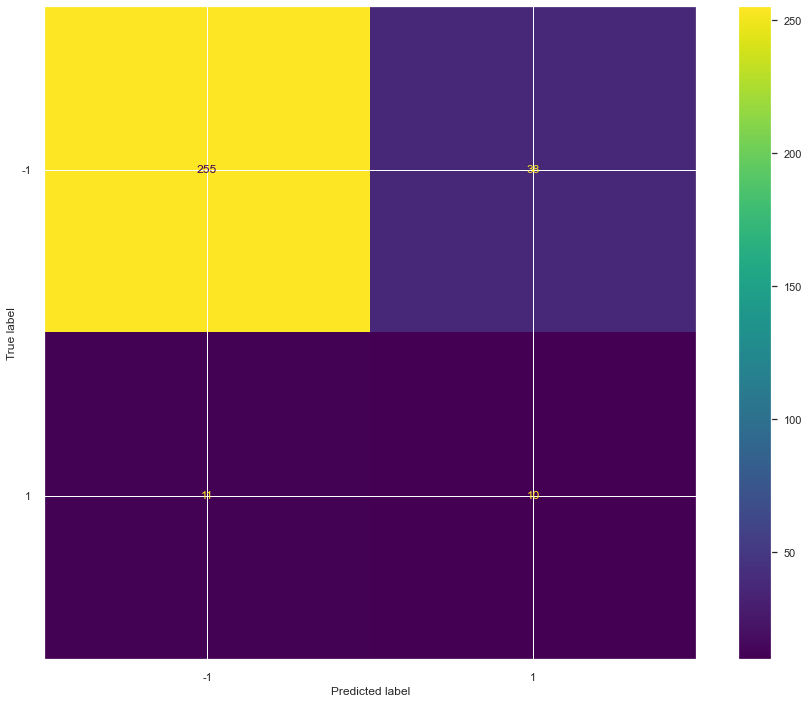

              precision    recall  f1-score   support

          -1       0.96      0.87      0.91       293
           1       0.21      0.48      0.29        21

    accuracy                           0.84       314
   macro avg       0.58      0.67      0.60       314
weighted avg       0.91      0.84      0.87       314



In [ ]:
# Plot confussion matrix
cm = confusion_matrix(y_test, y_pred_test, labels=xg.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xg.best_estimator_.classes_)
disp.plot()
plt.show()
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_test))

Ensembled/Voting Classifier

In [ ]:
'from sklearn.ensemble import VotingClassifier

SyntaxError: EOL while scanning string literal (Temp/ipykernel_11112/238480234.py, line 1)

In [ ]:
vc=VotingClassifier([('clf1',rf),('clf2',grad),('clf3',xgb)])
cross_val_score(vc,X_resampled,y_resampled).mean()

[19:37:56] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:37:56] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:37:59] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being use

0.9661669451738681

In [ ]:
param={'voting' :['hard','soft'],
        'weights' :  [(1,1,1),(2,1,1),(1,2,1),(1,1,2)]}

In [ ]:
#find best set of parameters
grid_voting= GridSearchCV(vc,param,scoring='recall')
voting=grid_voting.fit(X_resampled,y_resampled)
grid_voting.best_params_

[19:53:48] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:53:48] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:53:51] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being use

{'voting': 'soft', 'weights': (1, 2, 1)}

In [ ]:
#what accuracy is now?
grid_voting.best_score_

0.9921472037090698

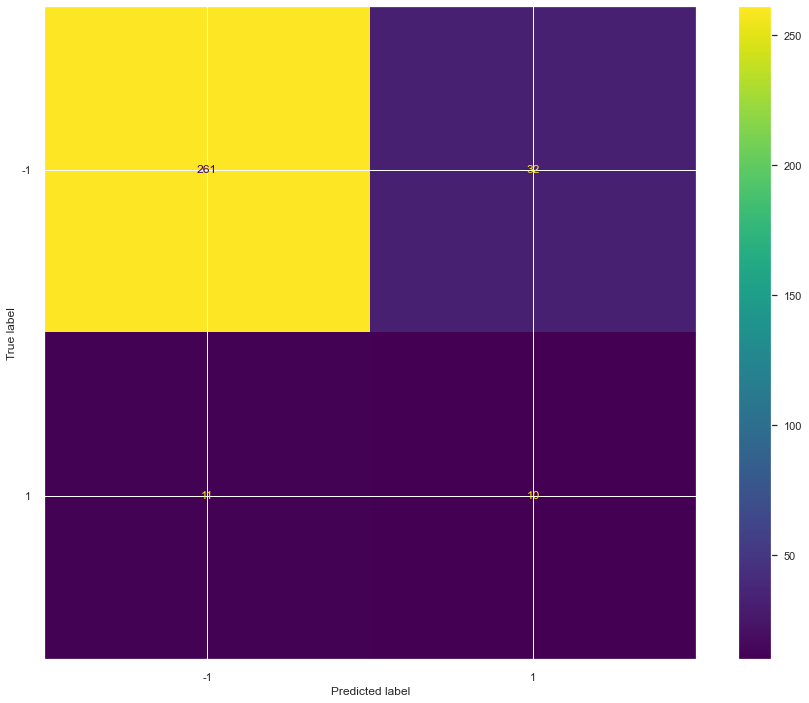

              precision    recall  f1-score   support

          -1       0.96      0.89      0.92       293
           1       0.24      0.48      0.32        21

    accuracy                           0.86       314
   macro avg       0.60      0.68      0.62       314
weighted avg       0.91      0.86      0.88       314



In [ ]:
# Plot confussion matrix
cm = confusion_matrix(y_test, y_pred_test, labels=grid_voting.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_voting.best_estimator_.classes_)
disp.plot()
plt.show()
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_test)) 

In [ ]:
def run_model(X_train, y_train, X_test, y_test):

    model=grid_voting.best_estimator_.fit(X_resampled, y_resampled)  

    #For TEST SPLIT
    y_pred= model.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    accuracy= accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred) ##
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    specificity = cf_matrix[1][1] / ( cf_matrix[1][1] + cf_matrix[1][0] )
    auc = roc_auc_score(y_test, y_pred)
    type_1_error_FP = cf_matrix[0][1]
    type_2_error_FN = cf_matrix[1][0]
    log_loss_ = log_loss(y_test, y_pred)
    cohen_kappa_score_ = cohen_kappa_score(y_test, y_pred)
    #Note by default 1 is the positive label. Therefore, -1 is negative
    #bad waffe -> 2 line of matrix -> POSITIVE -> data = -1

    #For TRAIN SPLIT
    y_pred_train= model.predict(X_train)
    cf_matrix_train = confusion_matrix(y_train, y_pred_train)
    accuracy_train= accuracy_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train) ##
    precision_train = precision_score(y_train, y_pred_train)
    recall_train = recall_score(y_train, y_pred_train)
    specificity_train = cf_matrix_train[1][1] / ( cf_matrix_train[1][1] + cf_matrix_train[1][0] )
    auc_train = roc_auc_score(y_train, y_pred_train)
    type_1_error_FP_train = cf_matrix_train[0][1]
    type_2_error_FN_train = cf_matrix_train[1][0]




    return cf_matrix, accuracy, f1, precision, recall, specificity, type_1_error_FP, type_2_error_FN, auc,log_loss_,cohen_kappa_score_, cf_matrix_train, accuracy_train, f1_train, precision_train, recall_train, specificity_train, type_1_error_FP_train, type_2_error_FN_train, auc_train


In [ ]:
run_model(X_resampled, y_resampled, X_test, y_test)

[19:56:23] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:56:23] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


(array([[268,  25],
        [  8,  13]], dtype=int64),
 0.8949044585987261,
 0.44067796610169496,
 0.34210526315789475,
 0.6190476190476191,
 0.6190476190476191,
 25,
 8,
 0.7668616934828538,
 3.6299350667764574,
 0.3879503839338453,
 array([[ 755,    0],
        [   0, 1018]], dtype=int64),
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0,
 0,
 1.0)

stacking classfier /ensemble

In [ ]:
from vecstack import stacking
from sklearn.metrics import mean_squared_error
# putting all base model objects in one list
all_models = [rf,grad,xgb]
 
# computing the stack features
s_train, s_test = stacking(all_models, X_resampled, X_test,
                           y_resampled, regression=True, n_folds=4)
 
# initializing the second-level model
final_model = rf
 
# fitting the second level model with stack features
final_model = final_model.fit(s_train, y_resampled)
 
# predicting the final output using stacking+
pred_final = final_model.predict(X_test)
 
# printing the root mean squared error between real value and predicted value
print(mean_squared_error(y_test, pred_final))

ValueError: y should be a 1d array, got an array of shape (314, 18) instead.

Adaboost Implementation

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
adb= AdaBoostClassifier(RandomForestClassifier(criterion='entropy'),n_estimators=1000, learning_rate=1)
# Fit the random search model


In [ ]:
parameters = {
    'n_estimators': [900,1000,1200]
}
clf = GridSearchCV(adb,parameters, cv=5,n_jobs=-1,scoring='recall')

In [ ]:
ada=clf.fit(X_resampled, y_resampled)

In [ ]:
# Evaluation using Startified K Fold cross validation
cv = StratifiedKFold(n_splits=5)
scores = cross_val_score(adb, X_resampled, y_resampled, cv=cv, scoring = 'recall')
print(scores.mean())
# fit
adbb=adb.fit(X_resampled, y_resampled)    
# predict
y_pred_test = adbb.predict(X_test)
# View accuracy score
accuracyFinal = accuracy_score(y_test, y_pred_test)
print('Test Accuracy : ', accuracyFinal)

0.9852747995750025
Test Accuracy :  0.856687898089172


In [ ]:
'def plot_decision_boundary(clf):
    plt.figure(figsize=(12, 8))
    x_range = np.linspace(X_resampled.min(), X_resampled.max(), 100)
    xx1, xx2 = clf.meshgrid(x_range, x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contourf(xx1, xx2, y_hat, alpha=0.2)
    plt.scatter(X_resampled[:,0], X_resampled[:,1], c=y, cmap='viridis', alpha=.7)
    plt.title("Adaboost Classifier")
    plt.show()

SyntaxError: EOL while scanning string literal (Temp/ipykernel_4184/297480987.py, line 1)

In [ ]:
plot_decision_boundary(adbb)

AttributeError: 'AdaBoostClassifier' object has no attribute 'meshgrid'

<Figure size 864x576 with 0 Axes>

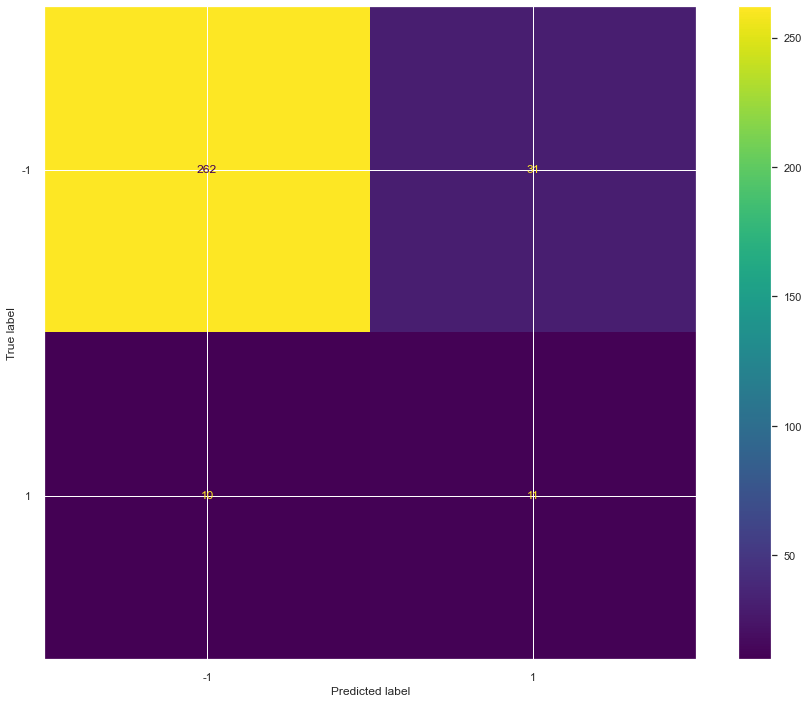

              precision    recall  f1-score   support

          -1       0.96      0.89      0.93       293
           1       0.26      0.52      0.35        21

    accuracy                           0.87       314
   macro avg       0.61      0.71      0.64       314
weighted avg       0.92      0.87      0.89       314



In [ ]:
# Plot confussion matrix
cm = confusion_matrix(y_test, y_pred_test, labels=ada.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=adb.classes_)
disp.plot()
plt.show()
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_test)) 

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score, roc_auc_score, log_loss, cohen_kappa_score

In [ ]:
def run_model(X_train, y_train, X_test, y_test):
    
    model=adbb.fit(X_resampled, y_resampled)  

    #For TEST SPLIT
    y_pred= model.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    accuracy= accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred) ##
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    specificity = cf_matrix[1][1] / ( cf_matrix[1][1] + cf_matrix[1][0] )
    auc = roc_auc_score(y_test, y_pred)
    type_1_error_FP = cf_matrix[0][1]
    type_2_error_FN = cf_matrix[1][0]
    log_loss_ = log_loss(y_test, y_pred)
    cohen_kappa_score_ = cohen_kappa_score(y_test, y_pred)
    #Note by default 1 is the positive label. Therefore, -1 is negative
    #bad waffe -> 2 line of matrix -> POSITIVE -> data = -1

    #For TRAIN SPLIT
    y_pred_train= model.predict(X_train)
    cf_matrix_train = confusion_matrix(y_train, y_pred_train)
    accuracy_train= accuracy_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train) ##
    precision_train = precision_score(y_train, y_pred_train)
    recall_train = recall_score(y_train, y_pred_train)
    specificity_train = cf_matrix_train[1][1] / ( cf_matrix_train[1][1] + cf_matrix_train[1][0] )
    auc_train = roc_auc_score(y_train, y_pred_train)
    type_1_error_FP_train = cf_matrix_train[0][1]
    type_2_error_FN_train = cf_matrix_train[1][0]




    return cf_matrix, accuracy, f1, precision, recall, specificity, type_1_error_FP, type_2_error_FN, auc,log_loss_,cohen_kappa_score_, cf_matrix_train, accuracy_train, f1_train, precision_train, recall_train, specificity_train, type_1_error_FP_train, type_2_error_FN_train, auc_train


In [ ]:
run_model(X_resampled, y_resampled, X_test, y_test)

(array([[264,  29],
        [ 12,   9]], dtype=int64),
 0.8694267515923567,
 0.30508474576271183,
 0.23684210526315788,
 0.42857142857142855,
 0.42857142857142855,
 29,
 12,
 0.6647976596782058,
 4.509914078079024,
 0.23957471943295927,
 array([[ 755,    0],
        [   0, 1018]], dtype=int64),
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0,
 0,
 1.0)